In [1]:
from glob import glob
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import resample

In [2]:
#storing all the paths of the 42 .edf files of Patient-1

all_file_path = glob('physionet.org/files/chbmit/1.0.0/chb01/*.edf')
all_file_path.sort()
all_file_path

['physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_05.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_06.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_07.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_08.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_09.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_10.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_11.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_12.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_13.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_14.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_15.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_16.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_17.edf',
 'physionet.org/files/chbmit/1.0.0/chb01/chb01_1

In [3]:
#function to read each .edf file

def read_data(file_path):
    datax = mne.io.read_raw_edf(file_path, preload = True)
    epochs=mne.make_fixed_length_epochs(datax,duration=1,overlap=0)
    epochs=epochs.get_data()
    return epochs

Extracting EDF parameters from /Users/ravisanker/Documents/Academics_3_1/ML/TermProject/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-3-dc578922603e>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax = mne.io.read_raw_edf(file_path, preload = True)


Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3600 events and 256 original time points ...
0 bad epochs dropped


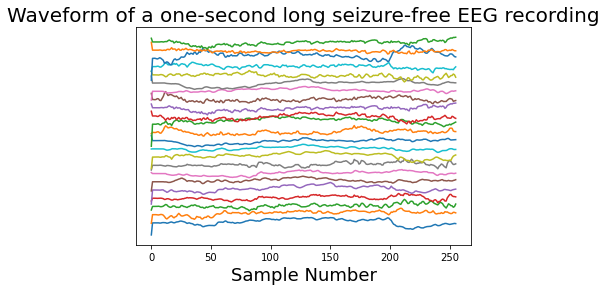

In [4]:
#seizure free recording for 1 second
#chb_01_01 has no seizure

#X1sec contains the data of the 1st second of Patient-1
X1sec = read_data(all_file_path[0])[0]
seizurefree = X1sec

x = [i for i in range(256)]

plt.xlabel('Sample Number', fontsize = 18)

#y-axis label is irrelevant as we are interested only in the shape of the waves
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.title('Waveform of a one-second long seizure-free EEG recording', fontsize = 20)

#0.0001*i is the offset to shift each channel while plotting it 
for i in range(23):
    plt.plot(x, seizurefree[i] + 0.0001*i)

Extracting EDF parameters from /Users/ravisanker/Documents/Academics_3_1/ML/TermProject/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-3-dc578922603e>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax = mne.io.read_raw_edf(file_path, preload = True)


Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3600 events and 256 original time points ...
0 bad epochs dropped


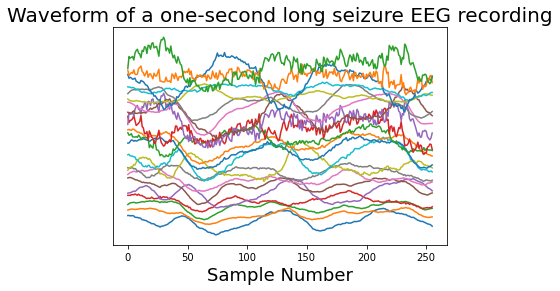

In [5]:
#seizure recording for 1 second
#chb_01_04 has seizure between 1467 seconds and 1494 seconds
#seizure contains the data of the 1471 second of the chb01_04.edf
seizure = read_data(all_file_path[3])[1470]

plt.xlabel('Sample Number', fontsize = 18)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.title('Waveform of a one-second long seizure EEG recording', fontsize = 20)
for i in range(23):
    plt.plot(x, seizure[i] + 0.0001*i)

In [6]:
#reading the first 4 edf files and storing it in data

numberOfFiles = len(all_file_path)
data = read_data(all_file_path[0])
#print(type(data))
for i in range(1,4):
    temp = read_data(all_file_path[i])
    data = np.concatenate((data, temp))
data.shape

Extracting EDF parameters from /Users/ravisanker/Documents/Academics_3_1/ML/TermProject/physionet.org/files/chbmit/1.0.0/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-3-dc578922603e>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax = mne.io.read_raw_edf(file_path, preload = True)


Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3600 events and 256 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/ravisanker/Documents/Academics_3_1/ML/TermProject/physionet.org/files/chbmit/1.0.0/chb01/chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-3-dc578922603e>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax = mne.io.read_raw_edf(file_path, preload = True)


Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3600 events and 256 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/ravisanker/Documents/Academics_3_1/ML/TermProject/physionet.org/files/chbmit/1.0.0/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-3-dc578922603e>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax = mne.io.read_raw_edf(file_path, preload = True)


Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3600 events and 256 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /Users/ravisanker/Documents/Academics_3_1/ML/TermProject/physionet.org/files/chbmit/1.0.0/chb01/chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-3-dc578922603e>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  datax = mne.io.read_raw_edf(file_path, preload = True)


Not setting metadata
3600 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3600 events and 256 original time points ...
0 bad epochs dropped


(14400, 23, 256)

In [7]:
#function to plot the Eigenvalue Waveform

def plotEigenvaluesWaveform(lambd, time_instance):
    fig,ax = plt.subplots()
    plt.xlabel('real(λ)', fontsize = 18)
    plt.ylabel('imag(λ)', fontsize = 18)
    plt.title('Eigenvalues of the waveform at time instance ' + str(time_instance), fontsize = 20)
    plt.grid()
    ax.scatter(lambd.real,lambd.imag)
    plt.show()

In [8]:
#function to plot DMD Mode Power

def plotDMDpowers(angle, phi_power, time_instance):
    fig,ax = plt.subplots()
    plt.xlabel('Frequency (Hz)', fontsize = 18)
    plt.ylabel('DMD Mode Power', fontsize = 18)
    plt.title('DMD mode powers of the waveform at time instance ' + str(time_instance), fontsize = 20)
    plt.step(np.abs(angle), phi_power,'o')
    plt.show()

In [9]:
#function to plot normalisec DMD Mode Power along with binning

def plotbins(norm_bin, time_instance):
    x = [i+1 for i in range(32)]
    plt.xticks([i for i in range(0,36,5)])
    plt.xlabel('Bin #', fontsize = 18)
    plt.ylabel('Normalized Power', fontsize = 18)
    plt.title('Normalized DMD Mode Power for time instance ' + str(time_instance), fontsize = 20)
    plt.bar(x,norm_bin)
    plt.show()

In [10]:
#function that basically does the entire feature extraction

def get_features(data,time_instance,bin_limits):
    X1sec = data[time_instance]
    X2sec = data[time_instance+1]
    
    # Making Xaug matrix
    
    prev = X1sec
    Xaug = prev
    num_rows = 23
    for i in range(num_rows-1):
        # cur -> 23 x 255
        cur = prev[:, 1:]

        # nxt -> 23 x 1
        nxt = X2sec[:, i:i+1]

        # cur becomes 23 x 256
        cur = np.c_[cur, nxt]

        Xaug = np.r_[Xaug, cur]
        prev = cur
        
    
    # Making Yaug matrix
    
    Yaug = Xaug[23:, :].copy()
    #print(Yaug.shape)
    temp1 = Xaug[23*(num_rows-1):, 1:].copy()
    #print(temp1.shape)
    temp1 = np.c_[temp1, X2sec[:,num_rows-1:num_rows]]
    #print(temp1.shape)
    Yaug = np.r_[Yaug, temp1]
    #Yaug.shape
    
    
    # DMD
    
    u, s, vh = np.linalg.svd(Xaug)
    s_ = np.diag(s).copy()
    #print(s_.shape)

    if (num_rows*23 < 256):
        vh = vh[0:num_rows*23, :].copy()
    elif (num_rows*23 > 256):
        u = u[:, 0:256].copy()
    #print(vh.shape)
    
    B = Yaug @ vh.T @ np.linalg.inv(s_)
    #B.shape
    
    A_tilda = u.T @ B
    #print(A_tilda.shape)
    
    lambd, w = np.linalg.eig(A_tilda)
    
    phi = B @ w
    #print(phi.shape)
    
    
    # Calculating DMD Powers and Angles of Eigenvalues in Argand plane (frequencies)
    
    phi_power = []
    angle = []
    for num_instance in range(0, phi.shape[1]):
        phi_power.append(np.linalg.norm(phi[:,num_instance],2)**2)
        angle.append(np.abs((1/(2*np.pi))*math.atan(np.imag(lambd[num_instance])/ np.real(lambd[num_instance]))))

    
    # Binning the Frequencies
    
    bins = []
    for i in range(32):
        bins.append(0)
    
    for i in angle:
        for j in range(32):
            if (np.abs(i)>=bin_limits[j] and np.abs(i)<bin_limits[j+1]):
                bins[j]+=1
                break
    
    
    # Normalizing the values 
    
    total_freq=0
    for i in range(32):
        total_freq+=bins[i]
    #print(total_freq)
    
    norm_bin=[]
    for i in range(len(bins)):
        norm_bin.append(bins[i]/total_freq)
        
    
    
    # Calculating Curve Lengths
    
    curve_lengths = []
    for i in range(23):
        val = 0
        for j in range(255):
            val += ((Xaug[i][j+1] - Xaug[i][j])**2 + (1/256)**2)**0.5
        curve_lengths.append(val)
        
    
    # Making final Feature array of size 1x55 (32 bins + 23 curve lengths)
    
    feat_array = norm_bin + curve_lengths
    
    if(time_instance == 0 or time_instance == 10200):
        plotEigenvaluesWaveform(lambd, time_instance)
        plotDMDpowers(angle, phi_power, time_instance)
        plotbins(norm_bin, time_instance)
        
    return feat_array

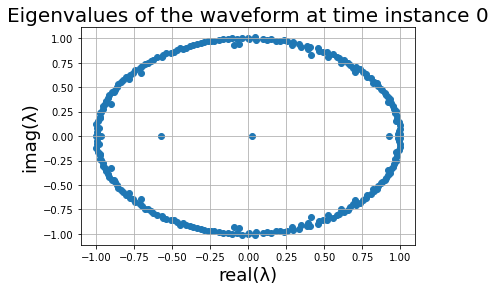

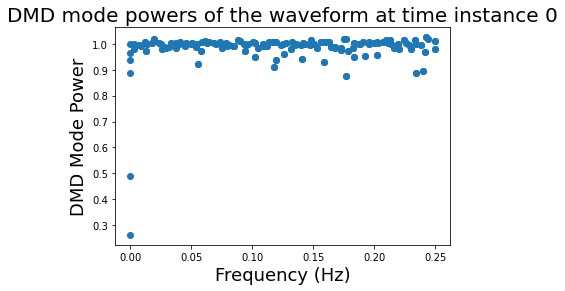

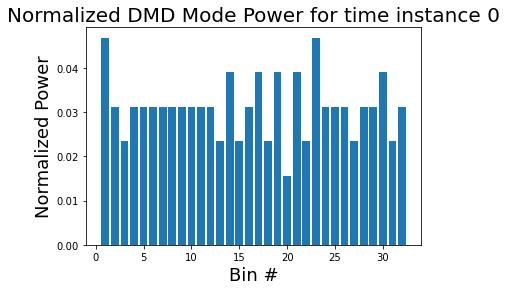

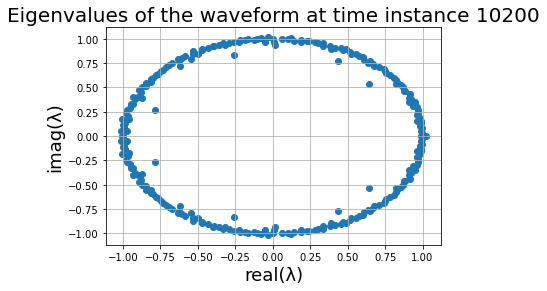

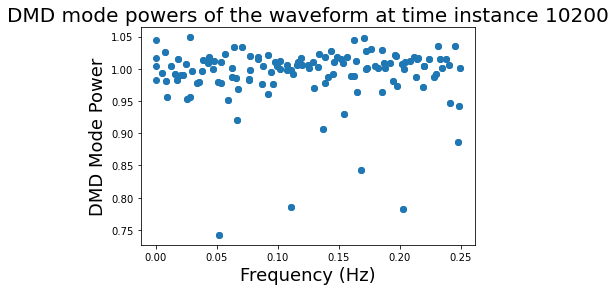

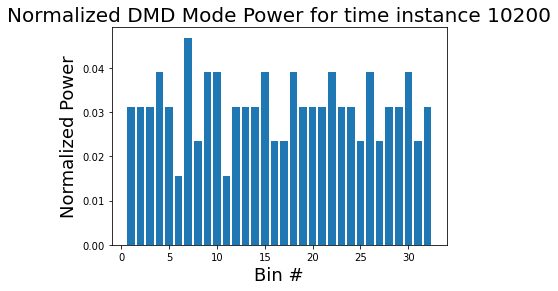

In [11]:
# time_instance values where seizures occur
# [10196] - [10235]
# [12266] - [12293]

#storing the upper and lower limits of the 32 bins
bin_limits = []
bin_limits.append(0)
for i in range(1,33):
    bin_limits.append(i*(0.25/32))

#storing features in X and corresponding labels in Y
X = []
Y = []

for i in range(0,len(data),2):
    X.append(get_features(data,i,bin_limits))
    if ( ((i >= 10196) and (i <= 10234)) or ((i >= 12266) and (i <= 12292)) ):  # checking for seizure instances
        Y.append(1)
    else:
        Y.append(0)


#splitting X and Y in 70:30 ratio for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

#adding label '0' instances to X_major and label '1' instances to X_minor 
X_maj = []
X_min = []
for i in range(len(X_train)):
    if (Y_train[i]==0):
        X_maj.append(X_train[i])
    else:
        X_min.append(X_train[i])

#performing random undersampling of x_maj so that number of instances of both classes become equal
rus_X_maj = resample(X_maj,replace=False,n_samples=len(X_min),random_state=42)

#combining rus_X_maj values with X_min values to get final X_train values
rus_X_train = rus_X_maj + X_min

rus_Y_train = []
for i in range(len(rus_X_maj)):
    rus_Y_train.append(0)
for i in range(len(X_min)):
    rus_Y_train.append(1)

#creating a model using ADABoost classifier and training it using X_train
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(rus_X_train,rus_Y_train)

#using trained model to make predictions for X_test
Y_pred = model.predict(X_test) 

#sensitivity and specificity calculation
fp, fn, tn, tp = 0, 0, 0, 0
for i in range(len(Y_pred)):
    if Y_test[i] == 0:
        if Y_pred[i] == 0:
            tn += 1
        else:
            fp += 1
    else:
        if Y_pred[i] == 0:
            fn += 1
        else:
            tp += 1
sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)

In [12]:
print("Sensitivity = " , sensitivity)
print("Specificity = " , specificity)

Sensitivity =  0.9375
Specificity =  0.9631529850746269
